In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as path
import os
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/DatosSigmoid.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [3]:
Data = pd.read_csv(file)
Data

,x,y
0,-3.186022,-0.126490
1,0.392737,3.396318
2,-4.817696,-0.032391
3,-1.577942,0.069783
4,-8.935573,0.017409
5,-0.592758,0.727137
6,4.934335,4.475377
7,-7.722024,0.024865
8,5.616402,4.506522
9,-5.407019,0.011716


In [4]:
X = np.float64(Data.x)
Y = np.float64(Data.y)

In [5]:
def Model(x,theta):
    return (theta[0])/(theta[1] + np.exp(-1*theta[2]*x))

In [6]:
def Metrica(theta):
    return np.sum((Y - Model(X, theta))**2)

In [7]:
def Grad1(t,  h=0.0001):
    Grad = np.zeros(3)
    
    Grad[0] = (Metrica([t[0]+h,t[1],t[2]]) - Metrica([t[0]-h,t[1],t[2]]))/(2*h)
    Grad[1] = (Metrica([t[0],t[1]+h,t[2]]) - Metrica([t[0],t[1]-h,t[2]]))/(2*h)
    Grad[2] = (Metrica([t[0],t[1],t[2]+h]) - Metrica([t[0],t[1],t[2]-h]))/(2*h)
    return Grad

In [8]:
def Grad2(t, h = 0.0001):
    Grad2 = np.zeros(3)
    for i in range(len(Grad2)):
        sum = 0
        t1 = t.copy()
        t2 = t.copy()
        t1[i] = t1[i]+h
        t2[i] = t2[i]-h
        for j in range(len(Y)):         
            sum+= (Y[j]-Model(X[j],t))*((Model(X[j],t1) - Model(X[j],t2))/(2*h)) 
        
        Grad2[i] =(-2)*sum 

    return Grad2

In [9]:
GradA = Grad1([1,1,1])
GradB = Grad2([1,1,1])
print(GradA)
print(GradB)

[-110.01069727  103.89144219   -5.93113599]
[-110.01069727  103.89144246   -5.93113598]


Lo anterior sirve para comprobar lo mostrado en el enunciado c y d (estan en la carpeta docs).

In [10]:
def Grad_descent(theta = np.array(([1., 1., 1.])), gamma = 5*10**(-4), stop_err = 0.01, imax = 10**4):
    
    trayectory = []
    err = np.inf
    i = 0
    while (i < imax)and (err > stop_err):
        theta = theta - gamma*Grad2(theta)
        trayectory.append(theta)
        err = Metrica(theta)
        i +=1
    return trayectory, err

In [11]:
Grad_des,err = Grad_descent()
print(Grad_des[-1])
print(err)

[4.15951337 0.92110979 2.84500773]
0.11501424301551634


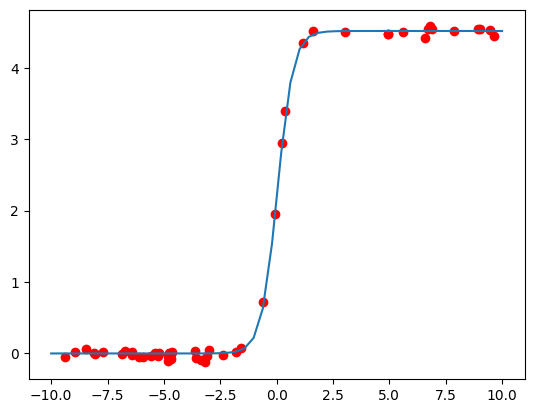

In [12]:
theta = Grad_des[-1] 
X_ = np.linspace(-10, 10, 50)
Y_ = Model(X_, theta)

plt.plot(X_, Y_)
plt.scatter(X,Y, color= 'r')
plt.show()